In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, download_plotlyjs, plot, iplot
import cufflinks as cf
import seaborn as snp
import lxml.html as lh
import requests

In [2]:
init_notebook_mode(connected=True)
cf.go_offline()

# reading world data from covid dataset kaggle

In [3]:
world_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
world_data.head(5)

,Id,Country_Region,Province_State,Date,ConfirmedCases,Fatalities
0,1,Afghanistan,NaN,2020-01-22,0.0,0.0
1,2,Afghanistan,NaN,2020-01-23,0.0,0.0
2,3,Afghanistan,NaN,2020-01-24,0.0,0.0
3,4,Afghanistan,NaN,2020-01-25,0.0,0.0
4,5,Afghanistan,NaN,2020-01-26,0.0,0.0


In [5]:
world_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24414 entries, 0 to 24413
Data columns (total 6 columns):
Id                24414 non-null int64
Country_Region    24414 non-null object
Province_State    10374 non-null object
Date              24414 non-null object
ConfirmedCases    24414 non-null float64
Fatalities        24414 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.1+ MB


In [6]:
world_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,24414.0,17823.500000,10300.689150,1.0,8912.25,17823.5,26734.75,35646.0
ConfirmedCases,24414.0,835.249447,6554.109673,0.0,0.00,0.0,75.00,151061.0
Fatalities,24414.0,39.778201,494.078524,0.0,0.00,0.0,0.00,17669.0


In [7]:
world_data.isnull().sum()

Id                    0
Country_Region        0
Province_State    14040
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

# filling null Provice/State to Other

In [8]:
world_data.fillna('Other', axis=1, inplace=True)
test_data.fillna('Other', axis=1, inplace=True)

# fetching India Data from world data

In [9]:
india_data = world_data[world_data['Country_Region'] == 'India']
india_data.drop(['Country_Region', 'Province_State'], axis=1, inplace=True)
india_test_data =  test_data[test_data['Country_Region'] == 'India']
india_test_data.drop(['Country_Region', 'Province_State'], axis=1, inplace=True)

In [10]:
india_data.iplot(x='Date',
                 y=['ConfirmedCases', 'Fatalities'],
                 xTitle='Date',
                 yTitle='Population',
                 title='India Covid19 Confirmed cases and Death Rate',
                 kind='line')

In [11]:
india_data['Date'] = india_data['Date'].apply(lambda x: x.replace('-', ''))
india_test_data['Date'] = india_test_data['Date'].apply(lambda x: x.replace('-', ''))

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [13]:
scalar = MinMaxScaler()

In [14]:
X = india_data.drop(['ConfirmedCases', 'Fatalities'], axis=1)
y1 = india_data['ConfirmedCases']
y2 = india_data['Fatalities']

In [15]:
X = scalar.fit_transform(X)
india_test_data = scalar.transform(india_test_data)

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
model = RandomForestRegressor(n_estimators=100)

In [18]:
model.fit(X, y1)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [19]:
prediction = (model.predict(india_test_data)/2).astype(int)

Text(0, 0.5, 'Prediction Rate')

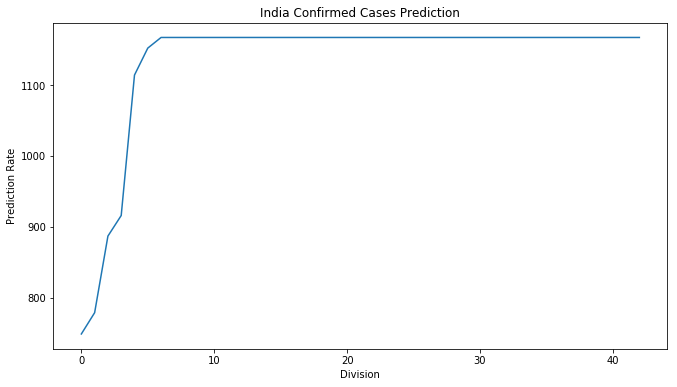

In [34]:
plt.figure(figsize=(11,6))
snp.lineplot(x=range(len(prediction)), y=prediction)
plt.title('India Confirmed Cases Prediction')
plt.xlabel('Division')
plt.ylabel('Prediction Rate')

In [30]:
death_model = RandomForestRegressor(n_estimators=100)

In [31]:
death_model.fit(X, y2)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [32]:
death_prediction = (death_model.predict(india_test_data)/2).astype(int)

Text(0, 0.5, 'Prediction Rate')

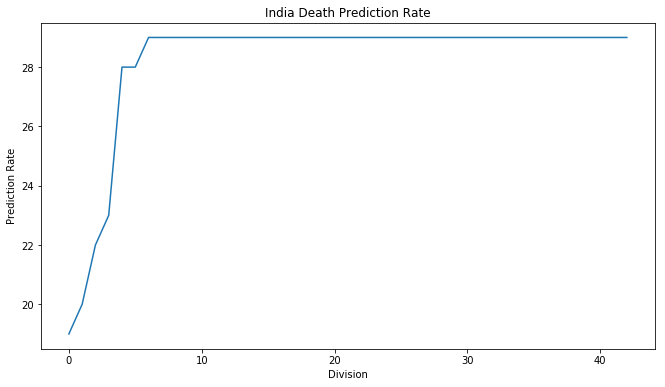

In [33]:
plt.figure(figsize=(11,6))
snp.lineplot(x=range(len(death_prediction)), y=death_prediction)
plt.title('India Death Prediction Rate')
plt.xlabel('Division')
plt.ylabel('Prediction Rate')